In [2]:
import sys
sys.path.insert(0, "..")

from data.image_folder import make_dataset

In [3]:
import os
from PIL import Image
import os

In [3]:
paths = sorted(make_dataset("/media/sdc/yuefeng/dataset/openImage/train_0"))


In [4]:
paths[:5]

['/media/sdc/yuefeng/dataset/openImage/train_0/000002b66c9c498e.jpg',
 '/media/sdc/yuefeng/dataset/openImage/train_0/000002b97e5471a0.jpg',
 '/media/sdc/yuefeng/dataset/openImage/train_0/000002c707c9895e.jpg',
 '/media/sdc/yuefeng/dataset/openImage/train_0/0000048549557964.jpg',
 '/media/sdc/yuefeng/dataset/openImage/train_0/000004f4400f6ec5.jpg']

In [9]:
for i in range(100):
    path = paths[i]
    img = Image.open(path).convert("RGB")
    w, h = img.size
    img = img.crop((0, 0, min(w, h), min(w, h))).resize((256, 256))

    save_dir = "/media/sdc/yuefeng/dataset/openImage/small_256"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    save_path = os.path.join(save_dir, os.path.basename(path))

    img.save(save_path)

In [14]:
!identify "/media/sdc/yuefeng/dataset/openImage/small_256/00008206f111b234.jpg"

/media/sdc/yuefeng/dataset/openImage/small_256/00008206f111b234.jpg JPEG 256x256 256x256+0+0 8-bit sRGB 13KB 0.000u 0:00.000


test if resize the edge map to a small size (256x256) can cause line disappear problem

In [10]:
from PIL import Image
from IPython.display import display

In [11]:
im = Image.open("/media/sdc/yuefeng/dataset/BIPED/edges/edge_maps/train/rgbr/aug/real_rot_342_ga60/RGB_258.png")

In [21]:
im_resized1 = im.resize((256, 256))
im_resized2 = im.resize((256, 256), resample=Image.LANCZOS)

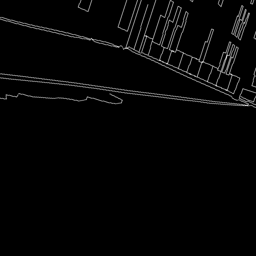

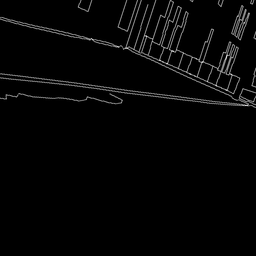

(None, None)

In [23]:
display(im_resized1), display(im_resized2)

In [25]:
!pwd

/media/sdc/yuefeng/programs/LCIC_plus-main/scripts


In [26]:
im_resized1.save("1.jpg")
im_resized2.save("2.jpg")

In [5]:
im = Image.open("/media/sdc/yuefeng/programs/edge_detection/DexiNed/DexiNed-TF2/data/0.jpg")
im = im.resize((256, 256))
im.save("/media/sdc/yuefeng/programs/edge_detection/DexiNed/DexiNed-TF2/data/0_256.jpg")

randomly move some files to test/ directory

In [5]:

IMG_EXTENSIONS = [
    '.jpg', '.JPG', '.jpeg', '.JPEG',
    '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP', '.tiff',
    '.txt', '.json'
]


def is_image_file(filename):
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)



In [6]:
import os
dir_path = "/media/sdc/yuefeng/dataset/CelebAMask-HQ/CelebA-HQ-img"
test_path = os.path.join(dir_path, "test")
train_path = os.path.join(dir_path, "train")
if not os.path.exists(test_path):
    os.makedirs(test_path)
if not os.path.exists(train_path):
    os.makedirs(train_path)

images = []
for root, _, fnames in sorted(os.walk(dir_path)):
    for fname in fnames:
        if is_image_file(fname):
            path = os.path.join(root, fname)
            images.append(path)


In [7]:
num_test = 3e4 * 0.1

for path in images:
    if int(os.path.basename(path).split('.')[0]) < num_test:
        os.rename(path, os.path.join(test_path, os.path.basename(path)))
    else:
        os.rename(path, os.path.join(train_path, os.path.basename(path)))